In [6]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

  

from sklearn.cluster import DBSCAN

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import normalize

from sklearn.decomposition import PCA

In [12]:
dk = pd.read_csv('D:testDF.csv')
  
# Удаление столбца из данных

#df['scr_ip'] = df.index


df = dk.drop('src_ip', axis = 1)
df = df.drop('Unnamed: 0', axis = 1)
  
# Обработка пропущенных значений

df.fillna(method ='ffill', inplace = True)

  

print(df.head())

   totalNum_AA  Num_countries  Num_days  Alertlevel  totalNum_TA  \
0          1.0            1.0       1.0         0.3          1.0   
1          1.0            1.0       2.0         0.3          1.0   
2          1.0            1.0       1.0         0.3          1.0   
3          1.0            1.0       1.0         0.3          1.0   
4          1.0            1.0       1.0         0.3          1.0   

   totalNum_TA_      Mark  
0             1  0.040625  
1             4  0.053125  
2             1  0.040625  
3             4  0.053125  
4             1  0.040625  


In [13]:
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)

  
# Нормализация данных так, чтобы
# данные примерно соответствуют гауссовскому распределению

df_normalized = normalize(df_scaled)

  
# Преобразование массива numpy в панду DataFrame

df_normalized = pd.DataFrame(df_normalized)

In [14]:
pca = PCA(n_components = 3)

df_principal = pca.fit_transform(df_normalized)

df_principal = pd.DataFrame(df_principal)

df_principal.columns = ['P1', 'P2', 'P3']

print(df_principal.head())

         P1        P2        P3
0 -0.535971  0.016670 -0.035690
1 -0.071208 -0.570158 -0.122731
2 -0.535971  0.016670 -0.035690
3 -0.522406 -0.023869  0.153010
4 -0.535971  0.016670 -0.035690


In [15]:
# Numpy массив всех меток кластера, назначенных каждой точке данных

db_default = DBSCAN(eps = 0.298, min_samples = 5).fit(df_principal)


#db_default = DBSCAN(eps = 0.59, min_samples = 5).fit(df_principal)

labels = db_default.labels_
db_default

DBSCAN(eps=0.298)

In [16]:
labels

array([ 0,  1,  0,  0,  0,  0,  2,  0,  0,  3,  1,  2,  0,  1,  0,  1,  1,
        0,  0,  0,  0,  0,  1,  1,  0,  2,  0,  1,  0,  0,  1,  0,  1,  0,
        0,  0,  1,  1,  1,  0,  0,  0,  1,  0,  1,  1,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  2,  1,  1,
        2,  2,  1,  2,  2,  0,  2,  0,  0,  1,  2,  1,  2,  2,  0,  2,  3,
        0,  2,  0,  0,  0,  0,  0,  0,  2,  0,  1,  0,  2,  0,  0,  0,  2,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  2,  2,  0,  1,  0,
        1,  0,  1,  0,  0,  3,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  2,  0,  2,  0,  2,
       -1,  0,  0,  0,  2,  2,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  2,  1,  0,  0,  0,  0,  2,
        2,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  1,  2,  2,  0,  0,  0,
        0,  0,  0,  0, -1

In [17]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 10


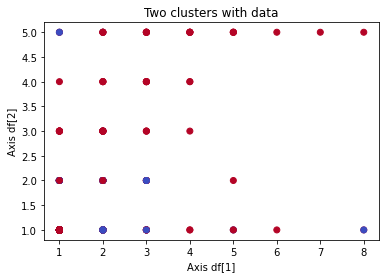

In [18]:
# Generate scatter plot 
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
plt.scatter(df.iloc[:,1], df.iloc[:,2], c=colors, marker="o", picker=True)
plt.title('Two clusters with data')
plt.xlabel('Axis df[1]')
plt.ylabel('Axis df[2]')
plt.show()

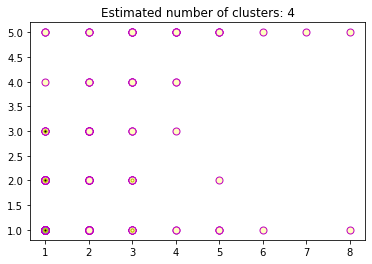

In [19]:
core_samples_mask = np.zeros_like(db_default.labels_, dtype=bool)
core_samples_mask[db_default.core_sample_indices_] = True
labels = db_default.labels_


# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = df[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 1], xy.iloc[:, 2], '.', markerfacecolor=tuple(col),
             markeredgecolor='m', markersize=14)

    xy = df[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 1], xy.iloc[:, 2], '.', markerfacecolor=tuple(col),
             markeredgecolor='y', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

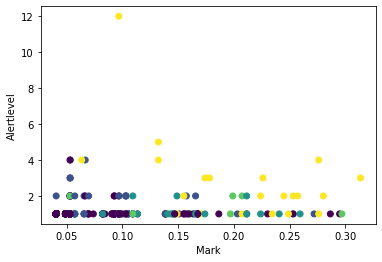

In [20]:
plt.scatter(df['Mark'], df['totalNum_AA'], c=df['Num_days'])

plt.xlabel('Mark')
plt.ylabel('Alertlevel')
plt.show()

In [21]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
#from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

#cluster_centers = [(1,1), (3,3), (5,5), (8,8)]
#centers = cluster_centers
#num_classes = len(cluster_centers)
#epsilon = 1.0
#min_samples = 13

#X, labels_true = make_blobs(n_samples=622, centers=centers, cluster_std=0.3,random_state=0)

core_samples_mask = np.zeros_like(db_default.labels_, dtype=bool)
core_samples_mask[db_default.core_sample_indices_] = True
labels = db_default.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

"""
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
'''
# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()
"""

Estimated number of clusters: 4
Estimated number of noise points: 10


'\nprint("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))\nprint("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))\nprint("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))\nprint("Adjusted Rand Index: %0.3f"\n      % metrics.adjusted_rand_score(labels_true, labels))\nprint("Adjusted Mutual Information: %0.3f"\n      % metrics.adjusted_mutual_info_score(labels_true, labels))\nprint("Silhouette Coefficient: %0.3f"\n      % metrics.silhouette_score(X, labels))\n\'\'\'\n# #############################################################################\n# Plot result\nimport matplotlib.pyplot as plt\n\n# Black removed and is used for noise instead.\nunique_labels = set(labels)\ncolors = [plt.cm.Spectral(each)\n          for each in np.linspace(0, 1, len(unique_labels))]\nfor k, col in zip(unique_labels, colors):\n    if k == -1:\n        # Black used for noise.\n        col = [0, 0, 0, 1]\n\n    class_member_mask = (labels == k)\n\n

In [22]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.4, min_samples=20)
db.fit(df)

DBSCAN(eps=0.4, min_samples=20)

Text(0.5, 1.0, 'Clusters determined by DBSCAN')

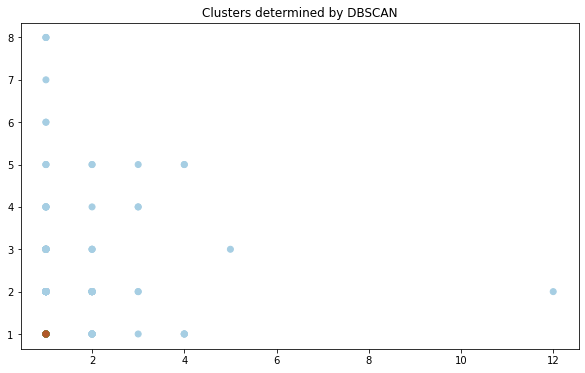

In [23]:
y_pred = db.fit_predict(df)
plt.figure(figsize=(10,6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],c=y_pred, cmap='Paired')
plt.title("Clusters determined by DBSCAN")

In [24]:
db.labels_[db.labels_ == -1].size

302

In [26]:
db.labels_[db.labels_ == 1].size

31

In [30]:
df['Cluster'] = db.labels_

In [41]:
df['src_ip'] = dk.src_ip

In [42]:
df.head()

,totalNum_AA,Num_countries,Num_days,Alertlevel,totalNum_TA,totalNum_TA_,Mark,Cluster,src_ip
0,1.0,1.0,1.0,0.3,1.0,1,0.040625,0,1.202.147.132
1,1.0,1.0,2.0,0.3,1.0,4,0.053125,-1,1.204.24.117
2,1.0,1.0,1.0,0.3,1.0,1,0.040625,0,1.56.64.79
3,1.0,1.0,1.0,0.3,1.0,4,0.053125,-1,1.71.189.116
4,1.0,1.0,1.0,0.3,1.0,1,0.040625,0,10.108.2.96


In [32]:
# Размер надписей на графиках
PLOT_LABEL_FONT_SIZE = 14 
# Генерация цветовой схемы
# Возвращает список цветов
def getColors(n):
    COLORS = []
    cm = plt.cm.get_cmap('hsv', n)
    for i in np.arange(n):
        COLORS.append(cm(i))
    return COLORS

In [33]:
def dict_sort(my_dict):
    keys = []
    values = []
    my_dict = sorted(my_dict.items(), key=lambda x:x[1], reverse=True)
    for k, v in my_dict:
        keys.append(k)
        values.append(v)
    return (keys,values)

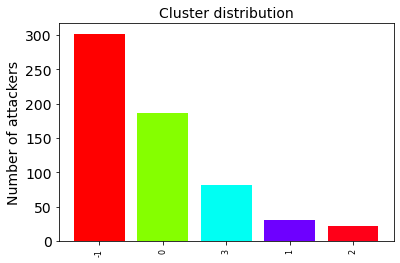

In [34]:
cluster_count = pd.value_counts(df['Cluster'].values, sort=True)
cluster_count_keys,cluster_count_values = dict_sort(dict(cluster_count))    
TOP_CLUSTER = len(cluster_count_keys)
plt.title('Cluster distribution', fontsize=PLOT_LABEL_FONT_SIZE)
plt.bar(np.arange(TOP_CLUSTER), cluster_count_values, color=getColors(TOP_CLUSTER))
plt.xticks(np.arange(TOP_CLUSTER), cluster_count_keys, rotation=90, fontsize=8)
plt.yticks(fontsize=PLOT_LABEL_FONT_SIZE)
plt.ylabel('Number of attackers', fontsize=PLOT_LABEL_FONT_SIZE)
#plt.yscale('log')
plt.show()

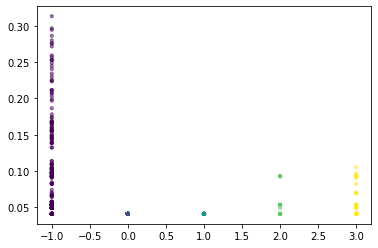

In [35]:
plt.scatter(df['Cluster'], df['Mark'], c= db.labels_.astype(float), s=10, alpha=0.5)

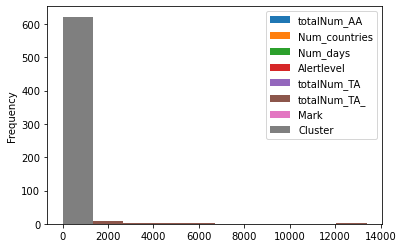

In [36]:
df.plot.hist()